# Digital Jackson Pollack's with Python

### Using [Pillow (Python Image Library)](https://github.com/python-pillow/Pillow), this notebook will show you how to generate Jackson Pollack-inspried digital canvases.

### For this demo, I will be imitating Jackson Pollack's 1952 *Convergence*

In [2]:
from art_functions import *

### Borrow Colors, store RGB values in tuples in list

In [3]:
palette = []
palette.append((33, 38.0, 69.0))
palette.append((31, 45.2, 73.5))
palette.append((51, 17.8, 85.7))
palette.append((72, 14.3, 6.9))
palette.append((256, 51.7, 5.7))
palette.append((211, 52.0, 29.4))
palette.append((50, 46.8, 54.3))
palette.append((10, 70.4, 56.3))

### Get dimensions, store as integers

In [4]:
# Convergence is 155" x 93.5
width = 800 # 8 inches
height = int(width * (93.5/155))

### Specify how many splatters you would like on your canvas

In [5]:
num_splatters = 5000

### Paint, store as NumPy Array

In [6]:
painting = jackson_pollack(width, height, len(palette), num_splatters)

### Write to Pillow's Image class by iterating through your painting

In [7]:
picture = canvas_to_image(canvas=painting,palette=palette)

### View

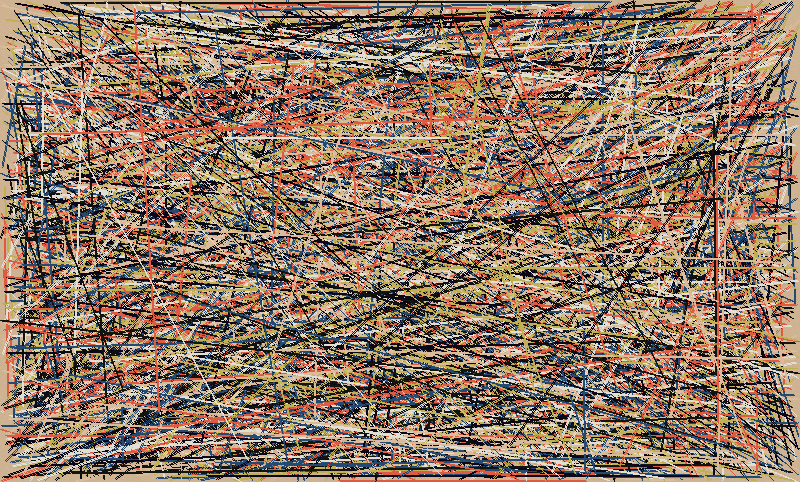

In [8]:
picture

### Add a white border/frame around your Image (nice for printing)

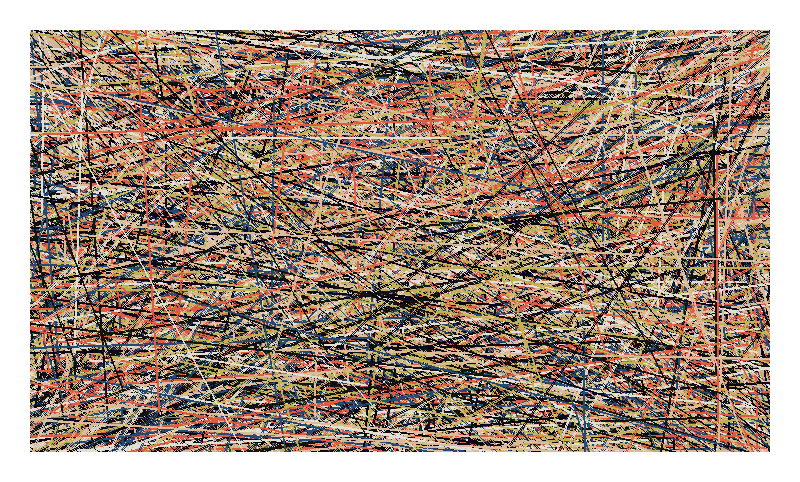

In [9]:
add_border_to_image(picture,inplace=True)
picture

### Write to file and save

In [10]:
picture.save("convergence.png", "PNG")

# Generate Images with randomized colors

### I you do not want to select your color palette, simply leave out the palette argument when initializing your Image.

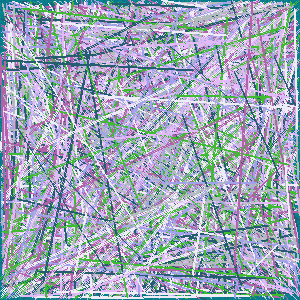

In [11]:
canvas = jackson_pollack(300, 300, 8, 5000)

picture_random_colors = canvas_to_image(canvas=canvas)

picture_random_colors

In [12]:
picture_random_colors.save("random_colors_X.png", "PNG")